## Tutorial on admixture mapping

In [3]:
import os
import sys
import subprocess
import matplotlib.pyplot as plt
import logging

logging.basicConfig(stream=sys.stdout, level=logging.INFO)

dir = os.path.abspath('../')
if not dir in sys.path: sys.path.append(dir)

from snputils.ancestry.io.local.read import MSPReader
from snputils.ancestry.io.local.write.adm_mapping_vcf import AdmixtureMappingVCFWriter
from snputils.visualization.admixture_manhattan_plot import manhattan_plot

### 1. Load Data

Load the Local Ancestry Inference (LAI) data into a LocalAncestryObject.

In [ ]:
# Specify the path to the LAI data file
filename = '../../Archivo/expanded_easComp_20_samples_chr1.msp'

# Load LAI data using MSPReader, which returns a LocalAncestryObject
laiobj = MSPReader(filename).read()

INFO:snputils.ancestry.io.local.read.msp:Reading msp file from '../../Archivo/expanded_easComp_20_samples_chr1.msp'...


### 2. Define the ancestry map
Define the ancestry map as a dictionary to map values to ancestries

In [5]:
# Define the ancestry map
ancestry_map = {
    0: 'Africa',
    1: 'Americas',
    2: 'Europe',
    3: 'SouthAsia',
    4: 'EastAsia'
}

### 3. Create admixture vcf file
Use the AdmixtureMappingVCFWriter object to and call the method write to create the ancestries vcf files

In [6]:
# Define the output file
output_file = '../../Archivo/lai.vcf'

# Define the writer
writer = AdmixtureMappingVCFWriter(laiobj, output_file, ancestry_map)

# Write the VCF files, one for each ancestry
writer.write()

INFO:snputils.ancestry.io.local.write.adm_mapping_vcf:Writing VCF file for ancestry 'Africa' to '../../Archivo/lai_Africa.vcf'...
INFO:snputils.ancestry.io.local.write.adm_mapping_vcf:Finished writing VCF file for ancestry 'Africa' to '../../Archivo/lai_Africa.vcf'...
INFO:snputils.ancestry.io.local.write.adm_mapping_vcf:Writing VCF file for ancestry 'Americas' to '../../Archivo/lai_Americas.vcf'...
INFO:snputils.ancestry.io.local.write.adm_mapping_vcf:Finished writing VCF file for ancestry 'Americas' to '../../Archivo/lai_Americas.vcf'...
INFO:snputils.ancestry.io.local.write.adm_mapping_vcf:Writing VCF file for ancestry 'Europe' to '../../Archivo/lai_Europe.vcf'...
INFO:snputils.ancestry.io.local.write.adm_mapping_vcf:Finished writing VCF file for ancestry 'Europe' to '../../Archivo/lai_Europe.vcf'...
INFO:snputils.ancestry.io.local.write.adm_mapping_vcf:Writing VCF file for ancestry 'SouthAsia' to '../../Archivo/lai_SouthAsia.vcf'...
INFO:snputils.ancestry.io.local.write.adm_mapping

### 4. execute analysis using plink2
The AdmixtureMappingVCFWriter will create vcf files that are suitable for plink2 (https://www.cog-genomics.org/plink/2.0/)

In [10]:
# define the files
vcf_file = '../../Archivo/lai_SouthAsia.vcf' # for exaple we can use SouthAsia ancestry
output_file = '../../Archivo/output_SouthAsia'
phenotype_file = '../../Archivo/expanded_phenotype_file.phe'

# define the command
command_to_run = [
    "/private/home/rsmerigl/plink2", 
    "--glm", 
    "allow-no-covars",
    "--vcf", vcf_file, 
    "--pheno", phenotype_file, 
    "--out", output_file
]

# run the command
subprocess.run(command_to_run, check=True)

PLINK v2.00a6LM 64-bit Intel (5 Feb 2024)      www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../Archivo/output_SouthAsia.log.
Options in effect:
  --glm allow-no-covars
  --out ../../Archivo/output_SouthAsia
  --pheno ../../Archivo/expanded_phenotype_file.phe
  --vcf ../../Archivo/lai_SouthAsia.vcf

Start time: Wed Nov  6 13:41:53 2024
1032042 MiB RAM detected, ~982686 available; reserving 516021 MiB for main
workspace.
Using up to 64 threads (change this with --threads).
--vcf: 18156 variants scanned.
--vcf: ../../Archivo/output_SouthAsia-temporary.pgen +
../../Archivo/output_SouthAsia-temporary.pvar.zst +
../../Archivo/output_SouthAsia-temporary.psam written.
23 samples (0 females, 0 males, 23 ambiguous; 23 founders) loaded from
../../Archivo/output_SouthAsia-temporary.psam.
18156 variants loaded from ../../Archivo/output_SouthAsia-temporary.pvar.zst.
1 binary phenotype loaded (2 cases, 21 controls).
Calcu

phenotype 'HC221'.


done.
Results written to ../../Archivo/output_SouthAsia.HC221.glm.logistic.hybrid .
End time: Wed Nov  6 13:41:53 2024


CompletedProcess(args=['/private/home/rsmerigl/plink2', '--glm', 'allow-no-covars', '--vcf', '../../Archivo/lai_SouthAsia.vcf', '--pheno', '../../Archivo/expanded_phenotype_file.phe', '--out', '../../Archivo/output_SouthAsia'], returncode=0)

### 5. Call the manhattan_plot
This function will create the manhattan plot to visualize the results

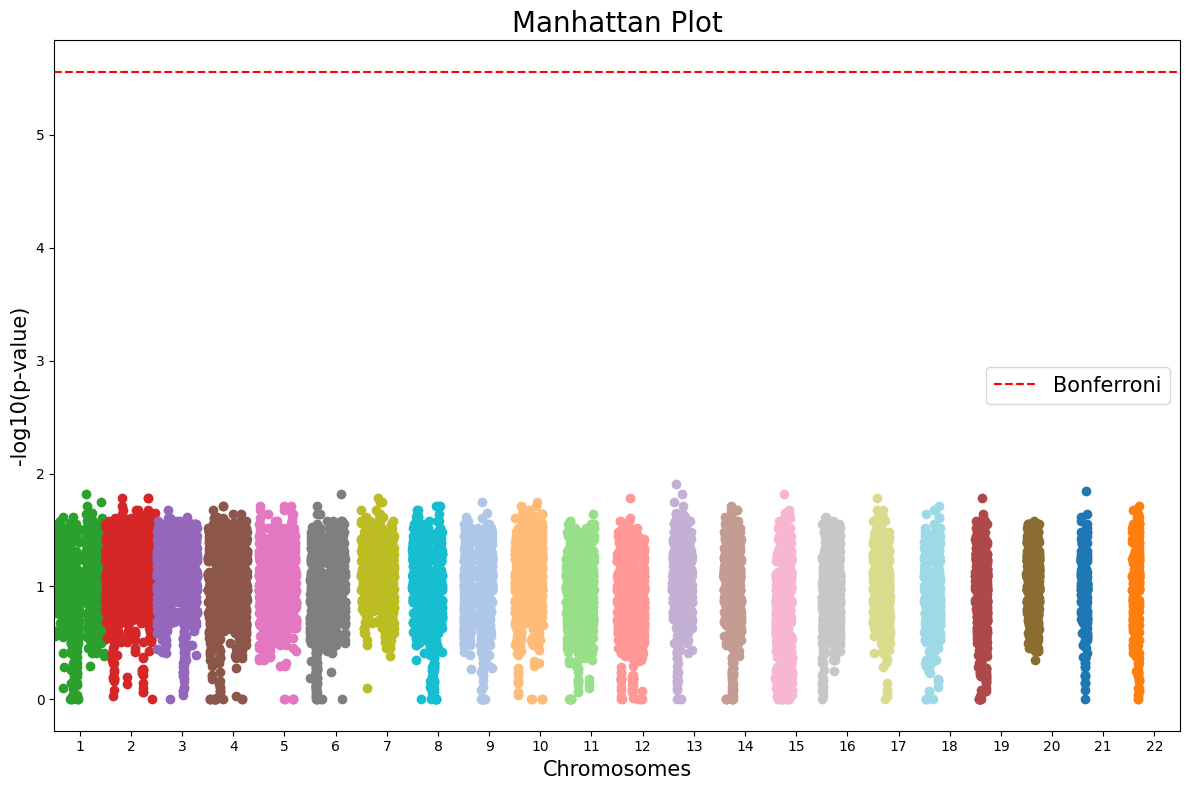

In [11]:
chromosome_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
    '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', 
    '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', 
    '#dbdb8d', '#9edae5', '#ad494a', '#8c6d31'
]

# Call the manhattan_plot function
manhattan_plot(
    input_file='../../Archivo/output_SouthAsia.HC221.glm.logistic.hybrid', 
    colors=chromosome_colors,
    significance_threshold=0.05,  # Default significance threshold
    figsize=(12, 8),  # Optional: Set the figure size
    title='Manhattan Plot',
    fontsize={'title': 20, 'xlabel': 15, 'ylabel': 15, 'legend': 15},
    save=True,
    output_filename='../../Archivo/manhattan_plot.png'
)
